# Telco Customer Churn Prediction

This project uses the IBM Telco Customer Churn dataset to predict whether a customer will churn (leave the company) based on their demographics, services, and account information.

**Goals:**
- Explore and understand the dataset.
- Perform data cleaning and preprocessing.
- Build and compare machine learning models.
- Evaluate performance using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.


### Imports & Data Loading

In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)


### Load Data

In [22]:
# Adjust path if needed
data_path = "/content/Telco_customer_churn.xlsx"
df = pd.read_excel(data_path)

df.head()


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


## Basic Structure & Cleaning

## Quick Info

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

### Basic Stats

In [24]:
df.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,7043,7043,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Count,7043.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Country,7043,1,United States,7043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,7043,1,California,7043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,7043,1129,Los Angeles,305,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zip Code,7043.0,NaN,NaN,NaN,93521.964646,1865.794555,90001.0,92102.0,93552.0,95351.0,96161.0
Lat Long,7043,1652,"34.159534, -116.425984",5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,7043.0,NaN,NaN,NaN,36.282441,2.455723,32.555828,34.030915,36.391777,38.224869,41.962127
Longitude,7043.0,NaN,NaN,NaN,-119.79888,2.157889,-124.301372,-121.815412,-119.730885,-118.043237,-114.192901
Gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Handle Common Issues

### Explore Target

In [25]:
target_col = "Churn Reason"  # make sure this matches your dataset

df[target_col].value_counts(normalize=True)


,proportion
Churn Reason,
Attitude of support person,0.102729
Competitor offered higher download speeds,0.101124
Competitor offered more data,0.086677
Don't know,0.082397
Competitor made better offer,0.074906
Attitude of service provider,0.072231
Competitor had better devices,0.069556
Network reliability,0.055110
Product dissatisfaction,0.054575


### Plot Class Balance

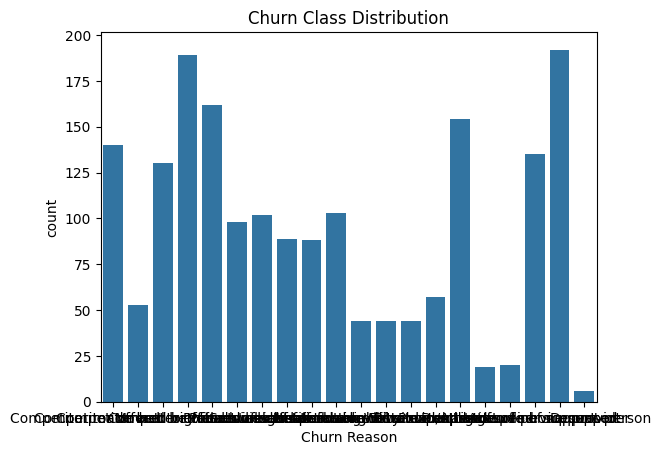

In [26]:
plt.figure()
sns.countplot(x=target_col, data=df)
plt.title("Churn Class Distribution")
plt.show()


Exploratory Data Analysis (EDA)

### Churn vs Contract Type

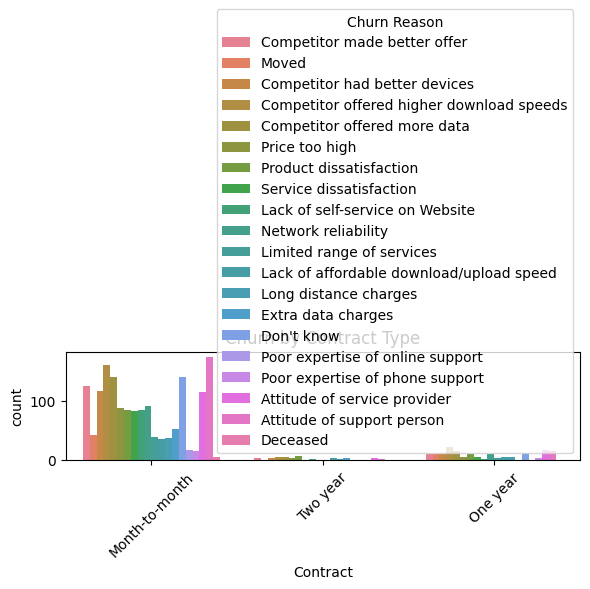

In [27]:
if "Contract" in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x="Contract", hue=target_col, data=df)
    plt.title("Churn by Contract Type")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### Numerical Distributions

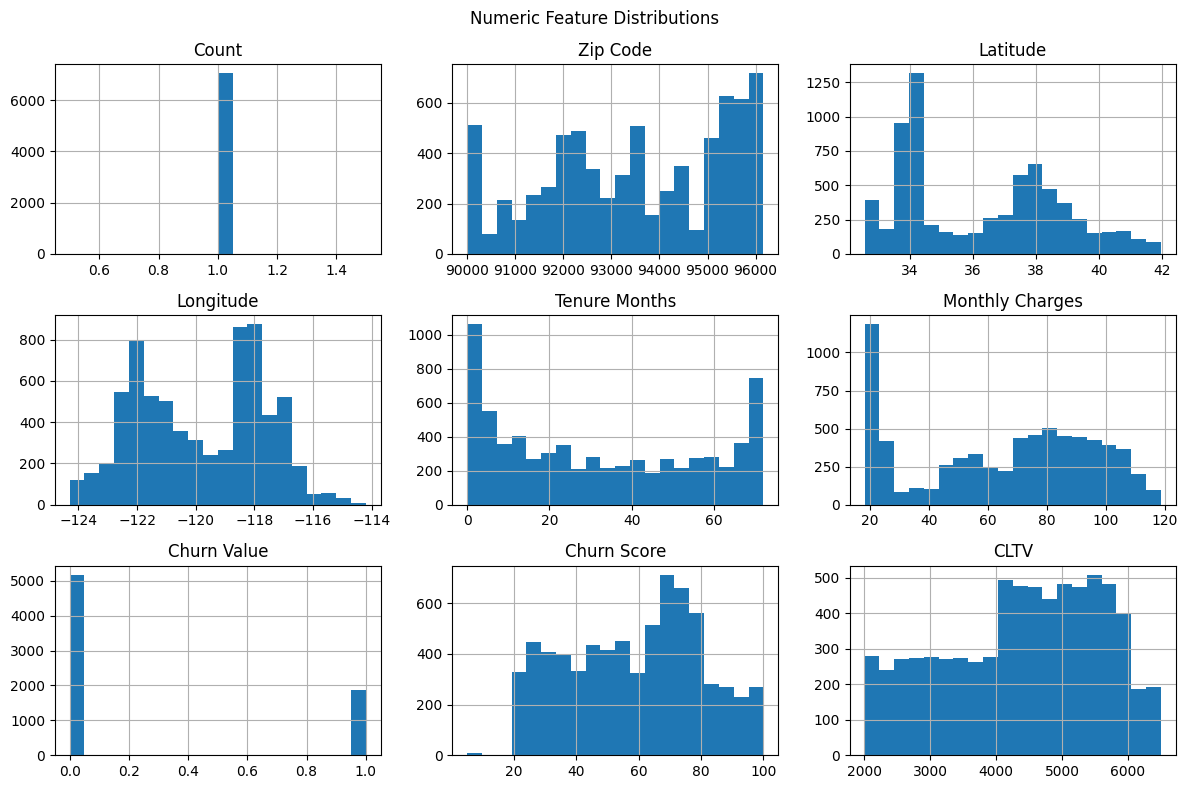

In [28]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

df[num_cols].hist(figsize=(12,8), bins=20)
plt.suptitle("Numeric Feature Distributions")
plt.tight_layout()
plt.show()


## Train/Test Split + Preprocessing

### Split Features & Target

In [29]:
X = df.drop(columns=[target_col])
y = df[target_col]

# If target is 'Yes'/'No', convert to 1/0
if y.dtype == "object":
    y = y.map({"Yes": 1, "No": 0})

X.head()


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340


### Identify Categorical & Numeric Column

In [30]:
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

cat_cols, num_cols


(['CustomerID',
  'Country',
  'State',
  'City',
  'Lat Long',
  'Gender',
  'Senior Citizen',
  'Partner',
  'Dependents',
  'Phone Service',
  'Multiple Lines',
  'Internet Service',
  'Online Security',
  'Online Backup',
  'Device Protection',
  'Tech Support',
  'Streaming TV',
  'Streaming Movies',
  'Contract',
  'Paperless Billing',
  'Payment Method',
  'Total Charges',
  'Churn Label'],
 ['Count',
  'Zip Code',
  'Latitude',
  'Longitude',
  'Tenure Months',
  'Monthly Charges',
  'Churn Value',
  'Churn Score',
  'CLTV'])

### Build Preprocessing with ColumnTransformer

In [33]:
binary_target_col = 'Churn Value'

# Redefine X and y to ensure correctness for binary churn prediction
# Drop all churn-related columns from X to prevent data leakage
# Also drop high-cardinality/uninformative features that can cause issues
X = df.drop(columns=[
    binary_target_col,
    'Churn Label',
    'Churn Score',
    'Churn Reason',
    'CustomerID',
    'Country',
    'State',
    'City',
    'Lat Long'  # Removing high-cardinality/uninformative columns
])
y = df[binary_target_col]

# Convert 'Total Charges' to numeric, coercing errors to NaN
X['Total Charges'] = pd.to_numeric(X['Total Charges'], errors='coerce')
# Fill NaN values in 'Total Charges' with the median
X['Total Charges'].fillna(X['Total Charges'].median(), inplace=True)

numeric_transformer = StandardScaler()

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# Update num_cols and cat_cols as X has changed
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train.shape, X_test.shape

((5634, 29), (1409, 29))

## Logistic Regression

### Pipeline + Training

In [34]:
log_reg = LogisticRegression(max_iter=1000)

log_reg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", log_reg)
])

log_reg_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Count', 'Zip Code',
                                                   'Latitude', 'Longitude',
                                                   'Tenure Months',
                                                   'Monthly Charges',
                                                   'Total Charges', 'CLTV']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['CustomerID', 'Country',
                                                   'State', 'City', 'Lat Long',
                                                   'Gender', 'Senior Citizen',
                                                   'Partner', 'Dependents',
                                                   'Phone Service',
                                                   'Multiple Lines',
                                                   'Internet Service',
                                                   'Online Security',
                                                   'Online Backup',
                                                   'Device Protection',
                                                   'Tech Support',
                                                   'Streaming TV',
                                                   'Streaming Movies',
                                                   'Contract',
                                                   'Paperless Billing',
                                                   'Payment Method'])])),
                ('model', LogisticRegression(max_iter=1000))])

### Evaluation Function

In [36]:
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)

    print(f"=== {model_name} Performance ===")
    print(f"Accuracy:  {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall:    {rec:.3f}")
    print(f"F1-score:  {f1:.3f}")
    print(f"ROC-AUC:   {roc:.3f}\n")

    print("Classification Report:\n")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.tight_layout()
    plt.show()

    return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1, "roc_auc": roc}


### Evaluate Logistic Regression

=== Logistic Regression Performance ===
Accuracy:  0.789
Precision: 0.618
Recall:    0.537
F1-score:  0.575
ROC-AUC:   0.836

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1035
           1       0.62      0.54      0.58       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409



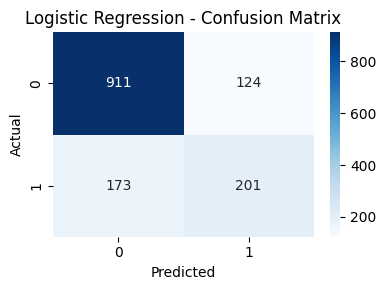

{'accuracy': 0.7892122072391767,
 'precision': 0.6184615384615385,
 'recall': 0.5374331550802139,
 'f1': 0.575107296137339,
 'roc_auc': np.float64(0.835769459298871)}

In [37]:
log_reg_metrics = evaluate_model(log_reg_pipeline, X_test, y_test, "Logistic Regression")
log_reg_metrics


## Random Forest

### Build & Train Random Forest Pipeline

In [38]:
rf_clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced"  # helps with class imbalance
)

rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", rf_clf)
])

rf_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Count', 'Zip Code',
                                                   'Latitude', 'Longitude',
                                                   'Tenure Months',
                                                   'Monthly Charges',
                                                   'Total Charges', 'CLTV']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['CustomerID', 'Country',
                                                   'State', 'City', 'Lat Long',
                                                   'Gender', 'Senior Citizen',
                                                   'Partner', 'Dependents',
                                                   'Phone Service',
                                                   'Multiple Lines',
                                                   'Internet Service',
                                                   'Online Security',
                                                   'Online Backup',
                                                   'Device Protection',
                                                   'Tech Support',
                                                   'Streaming TV',
                                                   'Streaming Movies',
                                                   'Contract',
                                                   'Paperless Billing',
                                                   'Payment Method'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, n_jobs=-1,
                                        random_state=42))])

### Evaluate Random Forest

=== Random Forest Performance ===
Accuracy:  0.789
Precision: 0.621
Recall:    0.529
F1-score:  0.571
ROC-AUC:   0.839

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1035
           1       0.62      0.53      0.57       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409



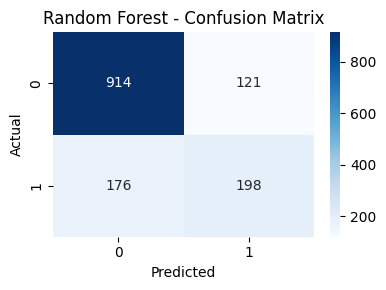

{'accuracy': 0.7892122072391767,
 'precision': 0.6206896551724138,
 'recall': 0.5294117647058824,
 'f1': 0.5714285714285714,
 'roc_auc': np.float64(0.8388255961145987)}

In [39]:
rf_metrics = evaluate_model(rf_pipeline, X_test, y_test, "Random Forest")
rf_metrics


## Compare Models

### Simple Comparison

In [40]:
comparison = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1", "ROC-AUC"],
    "Logistic Regression": [
        log_reg_metrics["accuracy"],
        log_reg_metrics["precision"],
        log_reg_metrics["recall"],
        log_reg_metrics["f1"],
        log_reg_metrics["roc_auc"],
    ],
    "Random Forest": [
        rf_metrics["accuracy"],
        rf_metrics["precision"],
        rf_metrics["recall"],
        rf_metrics["f1"],
        rf_metrics["roc_auc"],
    ],
})

comparison


,Metric,Logistic Regression,Random Forest
0,Accuracy,0.789212,0.789212
1,Precision,0.618462,0.620690
2,Recall,0.537433,0.529412
3,F1,0.575107,0.571429
4,ROC-AUC,0.835769,0.838826
